# Project: iMdb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
**This is my project submission using tdmb-movies.csv as my case study**
### Questions
1. **What are movies with most and least revenue?.**
2. **What are movies with highest and lowest budgets?.**
3. **What are movies with most and least profits?.**
4. **What are movies with most and least popularity?.**
5. **What are the genres with most number of movies?.**
6. **What are the years with most and least profits?.**
7. **What are the most successful genres?.**
8. **What is the average runtime for most successful movies?.**
9. **What is the average budget for most successful movies?.**
10. **What is the average revenue for most successful movies?.**
11. **Who are the most frequent directors of successful movies?.**

In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
>We need to investigate the database to see what data can we use for the analysis process

In [395]:
#lets import the database
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### First impression
1. budget and revenue are in numbers and no currency mentioned so we will be taking it as dollars
2. I will drop the column of "cast" as well, and keep the director since his opinion is necessarly needed while choosing actors
3. I will be judging the movie by its profits so we don't need the column of vote_average as well

In [396]:
#lets check for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>There's some null values

In [397]:
#time to know how many rows and columns are there
print('Columns: ' , df.shape[1]
     ,'\nRows: ', df.shape[0] )

Columns:  21 
Rows:  10866


In [398]:
#Calcualting how many duplicated rows are there
df_1 = df.drop_duplicates()
df.count()-df_1.count()

id                      1
imdb_id                 1
popularity              1
budget                  1
revenue                 1
original_title          1
cast                    1
homepage                0
director                1
tagline                 1
keywords                1
overview                1
runtime                 1
genres                  1
production_companies    1
release_date            1
vote_count              1
vote_average            1
release_year            1
budget_adj              1
revenue_adj             1
dtype: int64

>Seems like there's one duplicated row that differs only in homepage which means that the movie has two different homepages

In [399]:
#lets take a look at statistical values to see what columns we don't need
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>We need to insert a profit column after the revenue column, also we need to remove the 0 values

In [400]:
#Lets see how many unique values are there
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

>We are working with 56 years of data

<a id='cleaning'></a>
## Cleaning Data

>It found out that there's not-needed columns that should be removed, also there's 1 duplicated row that should be removed as well, plus we have to change the release_year into datetime datatype, change zeros in budget and revenue into *NA*, and finally removing all *NA* values so what we will do is :

1. Drop unused columns
2. Drop duplicated rows
3. Replace zeros in budget and revenue with *NA* then dropping *NA* values
4. Change the release_year dtype into datetime
5. Drop *NA* values again
6. Change dtype for revenue and budget columns into *int*

### **1. Drop unused columns**
>Columns to be dropped are : id,imdb_id,homepage,tagline,keywords,overview,production_companies,vote_count,vote_average,budget_adj,revenue_adj,cast.
since we don't need them for out analysis

In [401]:
#Lets remove the columns we wont use
df.drop(columns=['id','imdb_id','homepage','tagline','keywords','overview','production_companies','vote_count','vote_average','budget_adj','revenue_adj','cast'],inplace=True)

### **2. Drop duplicated rows**
>It's just one row for one movie with two different homepages

In [402]:
#We will get rid of the duplicated row
df.drop_duplicates(inplace=True)

### **3. Replace zeros in budget and revenue with *NA* then dropping the *NA* values**

In [403]:
#Lets replace 0 values in budget and revenue with NA
df['budget'] = df['budget'].replace(0, np.NAN)
df['revenue'] = df['revenue'].replace(0, np.NAN)

#Now we can drop the NA values
df.dropna(subset=['budget','revenue'],inplace=True)

### **4. Change the release_year dtype into datetime**

In [404]:
#We need to turn release_date column into datetime type
df['release_date'] = pd.to_datetime(df['release_date'])
#Check its type now
df['release_date'].dtype

dtype('<M8[ns]')

### 5. Drop *NA* values again
>since changing time datatype affects some values

In [405]:
#Now lets drop NA values
df.dropna(inplace=True)

### **6. Change dtype for revenue and budget columns into *int***

In [406]:
#We need to check the datatype for budget and revenue
df.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [407]:
#Change their datatypes into integrs so the calculations be easier
df = df.astype({'budget': int, 'revenue': int})

<a id='eda'></a>
## Exploratory Data Analysis

### Setting up some functions

In [408]:
#Catchs the name of the movie for the targetted column
def maxmin(col):
    x = df[df[col] == df[col].max()]
    y = df[df[col] == df[col].min()]
    x_print = print('Maximum {} is for the movie : \n{}'.format(col,x.original_title))
    y_print = print('Minimum {} is for the movie : \n{}'.format(col,y.original_title))
    return(x_print,y_print)

In [409]:
#Collects the statistics for the max and min values
def info(col):
    x = df[col].idxmax()
    dfx = pd.DataFrame(df.loc[x])
    y = df[col].idxmin()
    dfy = pd.DataFrame(df.loc[y])
    dfconcat = pd.concat([dfx,dfy],axis=1)
    return dfconcat

In [410]:
#Calculates the average for the column in the dataframe
def avg(col):
    x = int(df[col].mean())
    return x

In [411]:
#Separates genres in the dataframe
def data(col):
    x = df[col].str.cat(sep='|')
    y = pd.Series(x.split('|'))
    dfd = y.value_counts()
    return dfd

In [412]:
#Separates genres in the dataframe for successful movies only
def suc_data(col):
    x = successfulm[col].str.cat(sep='|')
    y = pd.Series(x.split('|'))
    dfd = y.value_counts()
    return dfd

In [413]:
#Calculates the average for the column in the dataframe for successful movies only
def suc_avg(col):
    x = int(successfulm[col].mean())
    return x

## Calculating profits

In [414]:
#Calculating the profits the inserting a column with it for each movie
profit = df['revenue']-df['budget']
df.insert(3,'profit',profit)

In [415]:
df.head(3)

,popularity,budget,revenue,profit,original_title,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13.112507,110000000,295238201,185238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


### 1. What are movies with most and least revenue?.

In [416]:
maxmin('revenue')

Maximum revenue is for the movie : 
3    Star Wars: The Force Awakens
Name: original_title, dtype: object
Minimum revenue is for the movie : 
1386    Avatar
Name: original_title, dtype: object


(None, None)

In [417]:
info('revenue')

,3,1386
popularity,11.173104,9.432768
budget,200000000,237000000
revenue,2068178225,-2147483648
profit,1868178225,1910483648
original_title,Star Wars: The Force Awakens,Avatar
director,J.J. Abrams,James Cameron
runtime,136,162
genres,Action|Adventure|Science Fiction|Fantasy,Action|Adventure|Fantasy|Science Fiction
release_date,2015-12-15 00:00:00,2009-12-10 00:00:00
release_year,2015,2009


>"Star Wars: The Force Awakens" with column id 3 has the highest revenue of all movies with a revenue of *2068178225* dollars while "Avatar" with column id 1386 has the lowest revenue of all movies with a revenue of *-2147483648* dollars. *(I must mention that I'm doupting the revenue of the movie Avatar)*

### 2. **What are movies with highest and lowest budgets?.**

In [418]:
maxmin('budget')

Maximum budget is for the movie : 
2244    The Warrior's Way
Name: original_title, dtype: object
Minimum budget is for the movie : 
2618               Lost & Found
3581    Love, Wedding, Marriage
Name: original_title, dtype: object


(None, None)

In [419]:
info('budget')

,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


>"The Warrior's Way" with column id 2244 has the highest budget of all movies with a budget of *425000000* dollars while "Lost & Found" with column id 2618 has the lowest budget of all movies with a budget of *1* dollars.

### 3. **What are movies with most and least profits?.**

In [420]:
maxmin('profit')

Maximum profit is for the movie : 
1386    Avatar
Name: original_title, dtype: object
Minimum profit is for the movie : 
2244    The Warrior's Way
Name: original_title, dtype: object


(None, None)

In [421]:
info('profit')

,1386,2244
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,-2147483648,11087569
profit,1910483648,-413912431
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


>"Avatar" with column id 1386 has the highest profits of all movies with a profit of *1910483648* dollars while "The Warrior's Way" with column id 2244 has the lowest profits of all movies with a profit of *-413912431* dollars.

### 4. **What are movies with most and least popularity?.**

In [422]:
maxmin('popularity')

Maximum popularity is for the movie : 
0    Jurassic World
Name: original_title, dtype: object
Minimum popularity is for the movie : 
7268    Born into Brothels
Name: original_title, dtype: object


(None, None)

In [423]:
info('popularity')

,0,7268
popularity,32.985763,0.001117
budget,150000000,350000
revenue,1513528810,3515061
profit,1363528810,3165061
original_title,Jurassic World,Born into Brothels
director,Colin Trevorrow,Zana Briski|Ross Kauffman
runtime,124,85
genres,Action|Adventure|Science Fiction|Thriller,Documentary
release_date,2015-06-09 00:00:00,2004-12-08 00:00:00
release_year,2015,2004


>"Jurassic World" with column id 0 has the highest popularity of all movies with a popularity of *32.985763* while "Born into Brothels" with column id 7268 has the lowest popularity of all movies with a popularity of *0.001117*.

### 5. **What are the genres with most number of movies?.**

In [424]:
data('genres')

Drama              1755
Comedy             1357
Thriller           1204
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              12
TV Movie              1
dtype: int64

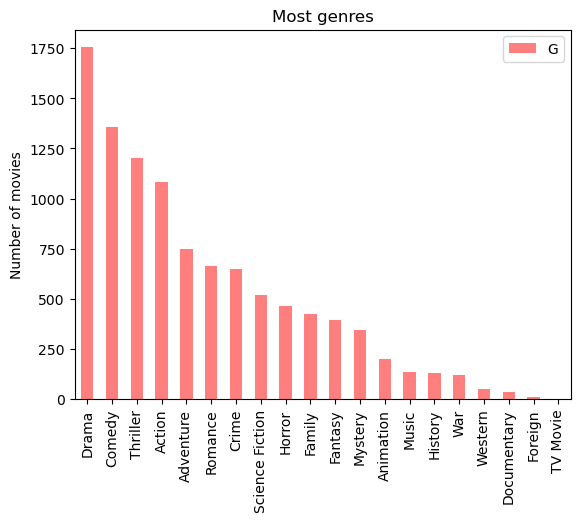

In [425]:
#Lets create a bar chart to get better visualization
dfg = pd.DataFrame(data('genres'))
dfg.plot(kind='bar',alpha=0.5,color='red',title='Most genres').set(ylabel='Number of movies')
plt.legend('G');

>From these calculations it seems that these genres "Drama,Comedy,Thriller,Action,Adventure" are having the largest number of movies.

### 6. **What are the years with most and least profits?.**

In [426]:
#We need to group the profits for each year by its total
years_profits = df.groupby('release_year')['profit'].sum()
years_profits = pd.DataFrame(years_profits)

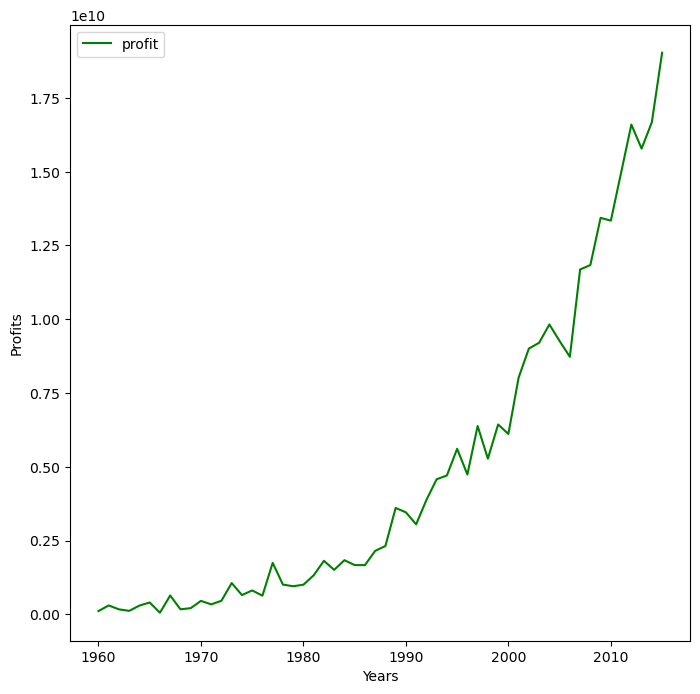

In [427]:
#Creating a line plot
years_profits.plot(color='green',figsize=(8,8)).set(ylabel='Profits',xlabel='Years');

In [428]:
#Calling the max year for profits
years_profits.idxmax()

profit    2015
dtype: int64

In [429]:
#Calling the min year for profits
years_profits.idxmin()

profit    1966
dtype: int64

>These calculations show that 2015 is the year with the most total gained profits, while 1966 are the least year with total gained profits.(we are judging by numbers, not by the true value) 

## Now lets filter the movies to see only the successful ones
>We can do this by calculating the mean for the profits and exclude all the movies that has lower profits than the mean.

In [430]:
avg('profit')

70334889

In [431]:
#Setting the movies into only successful ones
successfulm = df.query('profit >=  70334889')

In [432]:
print('Number of successful movies: {}'.format(successfulm.shape[0]))

Number of successful movies: 1067


### 7. **What are the most successful genres?.**

In [433]:
suc_gen = suc_data('genres')

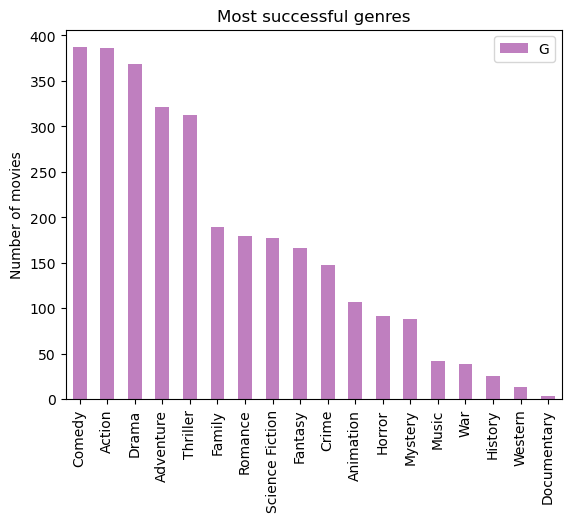

In [434]:
#Creating a bar chart to get better visualization
suc_gen.sort_values(ascending=False,inplace=True)
dfsg = pd.DataFrame(suc_gen)
dfsg.plot(kind='bar',alpha=0.5,color='purple',title='Most successful genres').set(ylabel='Number of movies')
plt.legend('G');

>These data shows that the most successful genres are actually : "Comedy,Action,Drama,Adventure,Thriller"

### 8. **What is the average runtime for most successful movies?.**

In [435]:
print('Successful movies have an average runtime of {} mins.'.format(suc_avg('runtime')))

Successful movies have an average runtime of 114 mins.


### 9. **What is the average budget for most successful movies?.**

In [436]:
print('Successful movies have an average budget of {}$'.format(suc_avg('budget')))

Successful movies have an average budget of 66556857$


### 10. **What is the average revenue for most successful movies?.**

In [437]:
print('Successful movies have an average revenue of {}$'.format(suc_avg('revenue')))

Successful movies have an average revenue of 290708617$


### 11. **Who are the most frequent directors of successful movies?.**

In [438]:
data('director')[0:5]

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Tim Burton          17
dtype: int64

>We used directors instead of cast, since his opinion is strongly affecting choosing the cast team

<a id='conclusions'></a>
## Conclusions

After analysing this data set we got these results:
1. Successful movies genres should be: Comedy,Action,Drama,Adventure,Thriller
2. They also have an average runtime of 114 mins
3. in addition to an average budget of *66556857* dollars
4. and finally it should be directed by: Steven Spielberg,Clint Eastwood,Ridley Scott,Woody Allen,Tim Burton
5. These steps should let the movie achieve an average of *290708617* dollars
**Important Note**: we considered successful movies as the movies that achieved more than or equal to an average profits of *70334889* dollars, and that was after cleaning the data from ***Null*** values and fixing it's columns formats, it might not be 100% accurate but we are sure that following the steps above will give a pleasent result. 